## Problem Statement
This tasks involves classifying a set of emails as spam or not spam. The data that you will be using to
classify the data is available at https://www.cs.cmu.edu/~einat/EnronMeetings-XML.zip
1. Read and load data from all the files in the train folder
2. Formulate a dataset based on the content of the email. You can choose any criteria for classifying
the content as spam or not spam but you need to justify your reasons.
3. Evaluate your model
4. Feed some testing data to it and classify is the email was spam or not

In [1]:
# importing necessary libraries

# for Data Loading, manipulication and analysis
import pandas as pd
# for Linear Algebra
import numpy as np
# for Data Cleansing
import re
# for operating system
import os
# for Machine Learning 
import sklearn

### 1. Reading and Loading Data from All files in the train folder into Dataframe

In [2]:
# first we have to read text files

# path of train folder dataset
data_folder_path = "C:/Users/Khizer Sultan//EnronMeetings-XML/train" 
# folders in the train folders
bunches_path = os.listdir(data_folder_path)
print(bunches_path)
# join the complete path for reading texts files 
txt_file_paths = []
for folder in bunches_path:
    txt_file_paths.append(os.path.join(data_folder_path,folder).replace('\\','/'))
txt_file_paths    

['bunch1', 'bunch2', 'bunch3']


['C:/Users/Khizer Sultan//EnronMeetings-XML/train/bunch1',
 'C:/Users/Khizer Sultan//EnronMeetings-XML/train/bunch2',
 'C:/Users/Khizer Sultan//EnronMeetings-XML/train/bunch3']

In [3]:
# list of files in every bunch folder
bunch_1_files = os.listdir(txt_file_paths[0])
bunch_2_files = os.listdir(txt_file_paths[1])
bunch_3_files = os.listdir(txt_file_paths[2])
# calculating the total files in every bunch folder
total_files = len(bunch_1_files) + len(bunch_2_files) + len(bunch_3_files)
print(f"Total numbers of files are {total_files}")

Total numbers of files are 729


### 1.2 Reading the files and inserting it into a Data frame 

In [4]:
# empty data frame to save the data
df = pd.DataFrame([])
# loop over the entire text files to read the files
for txt_file_path in txt_file_paths:
    # list of files in every bunch folder
    bunch_1_files = os.listdir(txt_file_path)
    # reading text files in every bunch folder
    for file_name in bunch_1_files:
        # creating the path of text files
        file_path = os.path.join(str(txt_file_path),file_name).replace('\\','/')
        # opening the file
        f = open(file=file_path)
        # reading the file and converting it into a Data frame
        df = df.append(pd.DataFrame([f.read()]), ignore_index = True)
        # printing the data files
#         print(df)

In [5]:
# Lets have a look at dataset
df
# every row contains one file

,0
0,Message-ID: <7789106.1072119990022.JavaMail.ev...
1,Message-ID: <24636930.1072120008699.JavaMail.e...
2,Message-ID: <29790196.1072120008955.JavaMail.e...
3,Message-ID: <18160814.1072120008978.JavaMail.e...
4,Message-ID: <17703062.1072120009010.JavaMail.e...
...,...
724,Message-ID: <32604680.1072121652870.JavaMail.e...
725,Message-ID: <1219085.1072121652894.JavaMail.ev...
726,Message-ID: <20966488.1072121652918.JavaMail.e...
727,Message-ID: <28674073.1072121652944.JavaMail.e...


In [6]:
# we can verify the number of files using rows
# every row contain one file, so 729 file and 729 rows
df.shape

(729, 1)

In [7]:
# lets save this data file into CSV file 
df.to_csv("email_data.csv")

### 2. Applying Data Cleansing
<br><br>
<li> Remove Puncuations and HTML Tags </li>
<li> Tokenization </li>
<li> Remove stop words </li>
<li> Normalization </li>
<li> Stemming </li>
<li> Lemmatization </li>

In [8]:
# importing data cleansing and NLP libraries
import re
# for removing HTML tags
from bs4 import BeautifulSoup
# for removing stop words
from nltk.corpus import stopwords
# for applying stemming
from nltk.stem.porter import PorterStemmer
# for applying lemmatization
from nltk.stem import WordNetLemmatizer

In [9]:
# set the column name of emails
df.columns = ['Emails']

In [10]:
def Text_Cleaner(text):
    
    # removing html tags
    soup = BeautifulSoup(text, "html.parser")
    
    # removed all html tags
    email = soup.get_text()
    
    # removing square brackets
    email =  re.sub('\[[^]]*\]',' ', email)

    # removing special characters and integers
    email = re.sub("[^a-zA-Z]",' ',email)
    
    # normalization (only lower case)
    email = email.lower()
    
    # tokanization 
    email = email.split()
    
    # remove stop words
    email = [word for word in email if not word in stopwords.words("english")]
    
    # Apply Stemming to get the root of the word
    ps = PorterStemmer()
    email = [ps.stem(word) for word in email if len(word) > 2]
    
    email = ' '.join(email)
    
    return email

In [11]:
# applying this function on the dataset 
df['Emails'] = df['Emails'].apply(Text_Cleaner)
# Data has been cleaned

### 3. Preparing Data for Machine Learning 

In [12]:
# TF-IDF is a matrix In information retrieval, tf–idf or TFIDF, 
# short for term frequency–inverse document frequency, is a numerical statistic 
# that is intended to reflect how important a word is to a document in a collection or corpus.
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# to apply Tf-IDF, we have to convert the dataframe into document
# so lets do :)
document = list(df.Emails)

### 3.1 Creating the TF-IDF Matrix

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1554)
X = vectorizer.fit_transform(document)

### 4. Applying Unsupervised Machine Learning Algorithm

In [15]:
# importing clsutering algorithm to label the data
from sklearn.cluster import KMeans
# for counting clusters
from collections import Counter as count
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# choosing the value of k as 2 because we have two classes (1)Spam (2) Not Spam
k = 2
# choosing the number of parameter
model = KMeans(n_clusters=k)
# applying K_Means Clustering algorithm
y_kmeans = model.fit_predict(X)

In [17]:
# counting the clusters
k_clusters = count(y_kmeans)
# we have cluster 1 and cluster 2
k_clusters

Counter({0: 293, 1: 436})

### 4.1 Converting Unsupervised data into Supervised data

In [18]:
# it is the output of clustering 
# i.e which points are laying in 1st cluster and in second cluster
df['Label'] = model.labels_

In [19]:
df.head(10)

,Emails,Label
0,messag javamail evan thyme date mon feb pst mc...,0
1,messag javamail evan thyme date mon feb pst ll...,0
2,messag javamail evan thyme date tue oct pdt da...,0
3,messag javamail evan thyme date fri oct pdt co...,0
4,messag javamail evan thyme date thu oct pdt ba...,1
5,messag javamail evan thyme date thu oct pdt ba...,1
6,messag javamail evan thyme date mon oct pdt ri...,0
7,messag javamail evan thyme date mon sep pdt ba...,1
8,messag javamail evan thyme date thu sep pdt ba...,1
9,messag javamail evan thyme date wed sep pdt ba...,1


### 4.2 Data is Labelled now but it is imbalanced

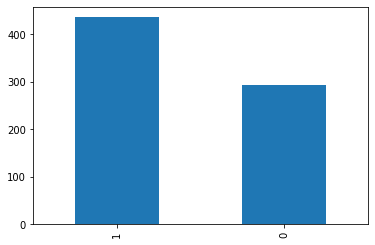

In [20]:
# Data is Imbalanced
df.Label.value_counts().plot(kind = 'bar')

# 1 stand for not spam
# 0 stand for spam

### 4.3 Balancing the Label Data 

In [21]:
# Smote is an algortihm for balancing the dataset
from imblearn.over_sampling import SMOTE

In [22]:
# applying smote algorithm 
oversample = SMOTE()
X, y = oversample.fit_resample(X, df.Label)

### 4.4 Data has been Balanced  

In [23]:
# lets verify this
dict(count(y).items())
# you can see, Data is Balanced now

{0: 436, 1: 436}

In [24]:
# converting a sparse dense matrix into an array 
X = X.toarray()

In [25]:
X.shape

(872, 1554)

### 4.5 Applying Supervised Machine Learning Algorithms

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state  = 42)

In [28]:
classifier = GradientBoostingClassifier()
result = classifier.fit(X_train,Y_train)

### 4.6 Evaluating my Model 

In [29]:
# result on training data
# which is 98%
result.score(X_train,Y_train) 

1.0

### 100% Accuracy on Training data 

In [30]:
# 81%  will be acc on validation dataset
valid_result = np.mean(cross_val_score(classifier,X_train,Y_train,cv=10,scoring='accuracy')) 
valid_result

0.988488612836439

### 98% Accuracy on Cross validation

In [31]:
# lets check on validation data
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(Y_test,y_pred)
test_acc # 67 %

0.9771428571428571

### 98% Accuracy on Validation Dataset 

In [32]:
# lets see using confusion matrix
matrix = confusion_matrix(Y_test,y_pred)
matrix

array([[85,  2],
       [ 2, 86]], dtype=int64)

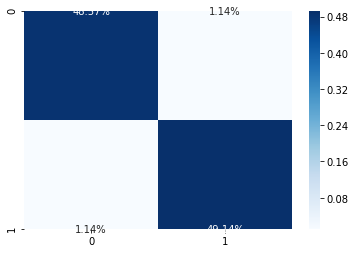

In [33]:
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### 4.7 Saving the Model for future use 

In [34]:
# importing necessary library
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)
# Model Have been saved

['finalized_model.sav']

### 5. Feeding test data to my Model 

### 5.1 Reading Test Files 

In [35]:
# first we have to read text files

# path of test folder dataset
data_folder_path = "C:/Users/Khizer Sultan//EnronMeetings-XML/test" 
# folders in the test folders
bunches_path = os.listdir(data_folder_path)
print(bunches_path)
# join the complete path for reading texts files 
txt_file_paths = []
for folder in bunches_path:
    txt_file_paths.append(os.path.join(data_folder_path,folder).replace('\\','/'))
txt_file_paths    

['bunch4']


['C:/Users/Khizer Sultan//EnronMeetings-XML/test/bunch4']

In [36]:
# empty data frame to save the data
df_test = pd.DataFrame([])
# loop over the entire text files to read the files
for txt_file_path in txt_file_paths:
    # list of files in every bunch folder
    bunch_1_files = os.listdir(txt_file_path)
    # reading text files in every bunch folder
    for file_name in bunch_1_files:
        # creating the path of text files
        file_path = os.path.join(str(txt_file_path),file_name).replace('\\','/')
        # opening the file
        f = open(file=file_path)
        # reading the file and converting it into a Data frame
        df_test = df_test.append(pd.DataFrame([f.read()]), ignore_index = True)
        # printing the data files
#         print(df_test)

In [37]:
# Assiging the column name to test data
df_test.columns = ['Emails']

In [38]:
# test data
df_test

,Emails
0,Message-ID: 17689680.1072131931037.JavaMail.e...
1,Message-ID: 8079197.1072131931233.JavaMail.ev...
2,Message-ID: 31781142.1072131933226.JavaMail.e...
3,Message-ID: 26205791.1072131933252.JavaMail.e...
4,Message-ID: 5270866.1072131933274.JavaMail.ev...
...,...
242,Message-ID: 2743223.1072121683713.JavaMail.ev...
243,Message-ID: 1563878.1072121683737.JavaMail.ev...
244,Message-ID: 10991220.1072121683760.JavaMail.e...
245,Message-ID: 12295394.1072121683783.JavaMail.e...


### 5.2 Cleaning Text Files 

In [39]:
# cleaning the test data
df_test.Emails = df_test.Emails.apply(Text_Cleaner)

In [40]:
# to apply Tf-IDF, we have to convert the dataframe into document
# so lets do :)
document = list(df_test.Emails)

### 5.3 Creating TF_IDF Matrix of test data

In [41]:
# creating the TF-IDF Matrix
vectorizer = TfidfVectorizer(stop_words='english', max_features=2597)
X = vectorizer.fit_transform(document)

In [42]:
# checking the shape of input features
X.toarray().shape

(247, 1554)

### 5.4 Applying Trained Model on test data 

In [43]:
# lets Applying Model on the test data
y_pred = classifier.predict(X.toarray())

In [44]:
# output: 0 is for not spam and 1 is for spam
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

### 5.5 Saving the output of test data into CSV file

In [45]:
# saving the file into test_output.csv file
pd.DataFrame(y_pred).to_csv('test_output.csv')

#### NOTE: if you have any query or question regarding this task, please feel free to ask at the below mentioned email:
khizersultan007@gmail.com